## Use Iris dataset and perform PCA on the dataset. Examine the first two principal components of X. 


## Create a scatter plot  with each of the 150 rows of X projected onto the first two principal components. Horizontal axis should be first principal component and vertical axis should be second principal component. 

In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import linalg as LA

In [34]:
df = pd.read_csv("iris(pca).csv")
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [35]:
X_standard = X - X.mean()
X_standard

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [36]:
Y_standard = Y-Y.mean()
Y_standard

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: species, Length: 150, dtype: float64

In [37]:
cov = np.cov(X_standard.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)

covariance matrix =
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [38]:
lambdas, vs = np.linalg.eig(cov)

In [39]:
lambdas

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [40]:
vs

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [41]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(lambdas)[::-1]

In [42]:
sorted_index

array([0, 1, 2, 3], dtype=int64)

In [43]:
sorted_eigenvalue = lambdas[sorted_index] 

In [44]:
sorted_eigenvalue

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [45]:
sorted_eigenvectors = vs[:,sorted_index]

In [46]:
sorted_eigenvectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [47]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [48]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.T,X_standard.T).T

In [49]:
print("Information/Variance in PC1",(sorted_eigenvalue[0]/(sorted_eigenvalue[0]+sorted_eigenvalue[1]))*100)

Information/Variance in PC1 94.57223216899484


In [50]:
X_reduced

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

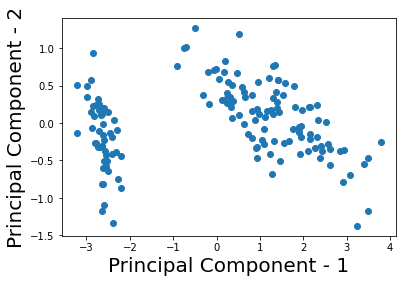

In [51]:
import matplotlib.pyplot as plt
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.scatter(X_reduced[:,0],X_reduced[:,-1])
plt.show()

In [52]:
projected_1 = X_reduced[:,0]
projected_2 = X_reduced[:,1]
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res.head()

,PC1,PC2,Y
0,-2.684126,-0.319397,1
1,-2.714142,0.177001,1
2,-2.888991,0.144949,1
3,-2.745343,0.318299,1
4,-2.728717,-0.326755,1


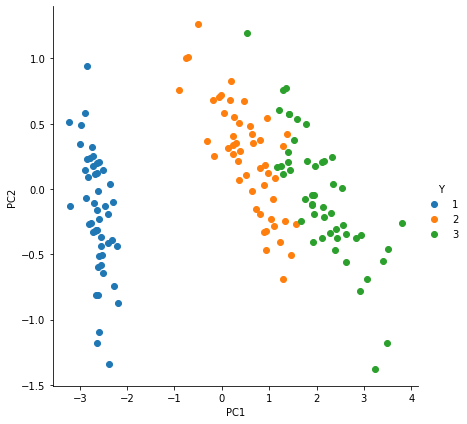

In [54]:
sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()